# Animated graph
This notebook shows how to use the matplotlib animate tool for turning a simple xy-graph into an animation. The last step saving the animation requires the ffmpeg package and takes some time - so be patient.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os

In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'pdf'
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['font.size'] = 24
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 24

plt.rcParams['axes.titlepad'] = 20

In [3]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [4]:
FILEs=["data1.dat",]

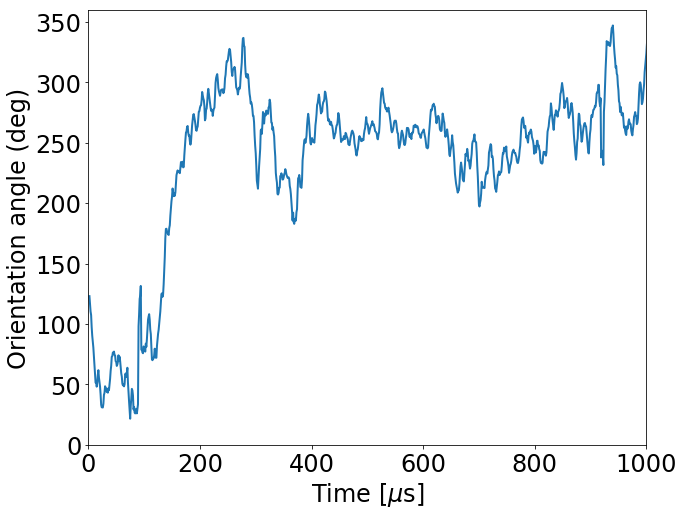

In [5]:
N = 5

figname = "data1.png"
        
Legends = ["data1.png",]
         
data = np.loadtxt("data1.dat", comments=["@","#"])
plt.plot(running_mean(data[:,0],N) ,running_mean(data[:,1],N), label="data1")
        
#plt.title(figname)
plt.xlim(0,1000)
plt.ylim(0,360)
#plt.legend(frameon=False, loc=0)
plt.xlabel(r'Time [$\mu$s]')
plt.ylabel("Orientation angle (deg)")
plt.savefig(figname, dpi=300)
        
plt.show()

Next, we'll calculate a running average of the data (using how many frames?) and create a movie where the graph grows over time. Note that this take some time, so be patient. If you have the hour glass icon in your tab at the top of the screen, Python is working, and you should wait. If you think things have failed, you can interrup the Kernel from the Notebook menu (Kernel -> interrupt).

3493
[[[2.00000000e+00 3.00000000e+00 4.00000000e+00 ... 3.49200000e+03
   3.49300000e+03 3.49400000e+03]]

 [[1.23055167e+02 1.16969558e+02 1.10449998e+02 ... 2.97783059e+02
   2.95031815e+02 2.94637582e+02]]]


/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


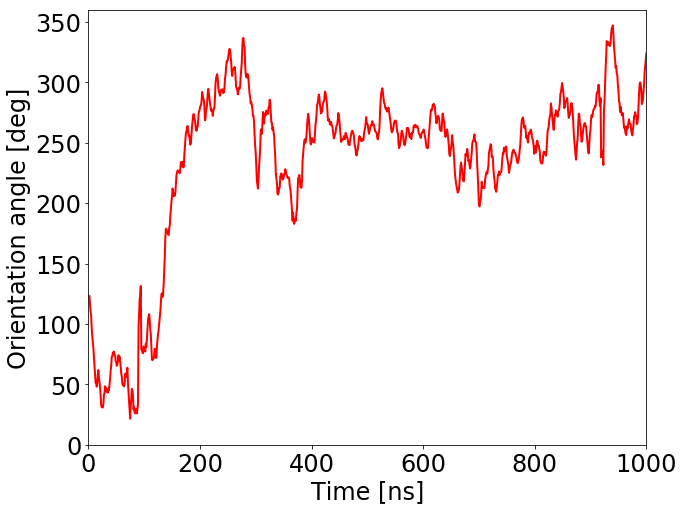

In [6]:
N = 5

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

fig1 = plt.figure()

list1 = [running_mean(data[:,0],N),]
list2 = [running_mean(data[:,1],N),]

list1_ar = np.array(list1)
list2_ar = np.array(list2)
        
print(list1_ar.size)
data1 = np.stack((list1_ar, list2_ar))
print(data1)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1000)
plt.ylim(0, 360)
plt.xlabel("Time [ns]")
plt.ylabel("Orientation angle [deg]")
line_ani = animation.FuncAnimation(fig1, update_line, 1000, fargs=(data1, l), interval=7, blit=True)

line_ani.save('data1.mp4')
        
plt.show()

The script exported the movie as data1.mp4. If you want to take a look, you can change to the main Notebook tab, navigate to the movie subfolder, download the file and play it with some movie app.